# SPECTRE TEST
- Using H5 Model trained using ISCX-IDS-2012 Dataset
- Testing using Malware_Capture_Facility_Project Dataset - CTU-Malware-Capture-Botnet-135-1 Stlrat DDoS (MD5: `c7838b75ba10b0341554d25fbcc3bbc0`)

---

## Import Dependencies

In [1]:
import sys
from scapy.all import *
import h5py
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tabulate import tabulate

2023-05-08 14:53:53.414641: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 14:53:53.587483: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 14:53:53.589534: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 14:53:54.711328: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# KAFKA IMPORT

## Import Data

### Load the npy file

In [10]:
# ISCX-IDS-2012 - 14 JUN
#mal_pcap = scapy.rdpcap('/mnt/Data/SPECTRE/Dataset/ISCX-2012/PCAP/testbed-14jun.pcap') 

# Malware_Capture_Facility_Project - CTU-Malware-Capture-Botnet-135-1 Stlrat DDoS
malicious_data = np.load('/home/aryn/spectre-dev/dataset/Malware_Capture_Facility_Project/PCAP-NPY/2015-09-10_winlinux.npy', allow_pickle=True)
malicious_data_2 = np.load('/home/aryn/spectre-dev/dataset/Malware_Capture_Facility_Project/PCAP-NPY/2015-09-10_winlinux_2.npy', allow_pickle=True)
training_sample = np.load('/home/aryn/spectre-dev/dataset/ISCX-IDS-2012/PCAP-NPY/destinationPayload_TestbedMonJun14Flows.xml.npy', allow_pickle=True)

In [11]:
rows_mal = malicious_data[:2]
table_mal = rows_mal.tolist()
print(tabulate(table_mal))

-  --  -  -  --  -  -  --  -  -  --  -  -  --  -  -------  --  -----------  -------  --  -----------  -------  --  -----------  -  --  -----------  -  --  -----------  -----------  -------  -----------  -----------  ----------  -------  -  -  -----------  -------  -----------  -----------  ----------  -------  -  -  ----------  -------  -  -  -------  -----------  -----------  -------  -----------  -----------  -------  -----------  -----------  -  -----------  -----------  -  -----------  -----------  -------  --  -----------  -------  --  -----------  -------  --  -----------  -  --  -----------  -  --  -----------  -----------  -------  -----------  -----------  ----------  -------  -  -  -----------  -------  -----------  -----------  ----------  -------  -  -  ----------  -------  -  -
1  72  0  1  72  0  1  72  0  1  72  0  1  72  0  1        72  0            1        72  0            1        72  0            1  72  0            1  72  0            0            101.823  0       

In [12]:
rows_mal_2 = malicious_data_2[:2]
table_mal_2 = rows_mal_2.tolist()
print(tabulate(table_mal_2))

----  -
7500  1
7500  1
----  -


In [13]:
rows_train = training_sample[:2]
table_train = rows_train.tolist()
print(tabulate(table_train))

-----------------------------  -
[ 43  79  75 ... 103 101 100]  0
[ 46  46  46 ... 110  46  46]  0
-----------------------------  -


/home/aryn/miniconda3/envs/spectre/lib/python3.9/site-packages/tabulate/__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)


### Prepare the data for the model

In [16]:
img_row = 50
img_col = 50

# Reshape the entire data_array into the desired format
test_data = np.array([x.reshape(img_row, img_col, 3) for x in training_sample[:, 0]])

# Predection

## Model Preperation

In [18]:
# Load TF Saved_model
spectre_model = tf.saved_model.load("/home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/SavedModel")

2023-05-08 19:04:44.248160: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-08 19:04:44.261183: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Load H5 Model

In [19]:
# H5 Model
spectre_model_h5 = keras.models.load_model('/home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/spectre_ddos_h5.h5')

### Load tflite Model

In [ ]:
# tflite Model
# Load the TFLite model in TFLite Interpreter
#interpreter = tf.lite.Interpreter('/home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/spectre_ddos_lite.tflite')
#interpreter.allocate_tensors()

# Get input and output tensors.
#input_details = interpreter.get_input_details()
#output_details = interpreter.get_output_details()

In [ ]:
#try:
    # Load the H5 model
#    with h5py.File('/home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/FYP_Finalh5.h5', 'r') as spectre_model:
        # Print metadata
#        print("H5 file metadata:")
#        print("==================")
#        for key, value in spectre_model.attrs.items():
#            print(f"{key}: {value}")
#        print("==================")
#        print("Done!")
#except:
#    print("Error loading H5 file.")

### Model Visualization

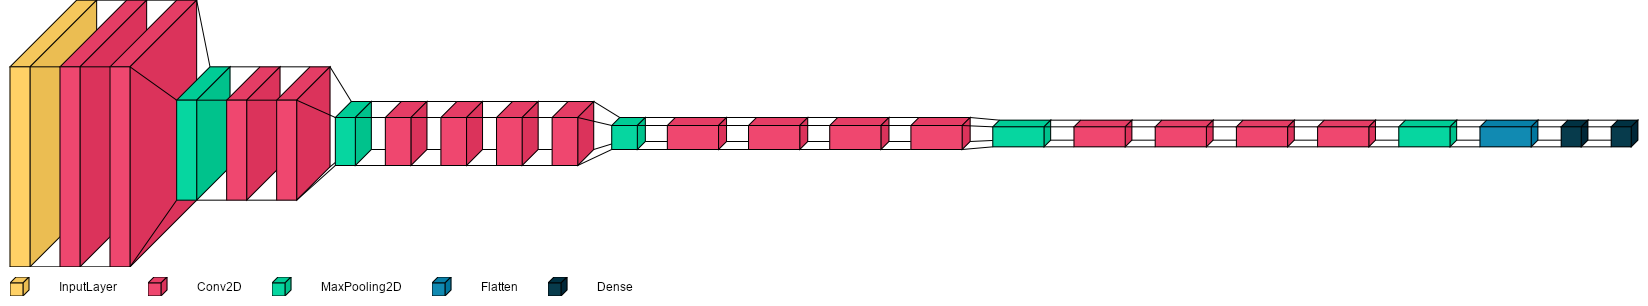

In [20]:
import visualkeras
from PIL import ImageFont
visual_font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(spectre_model_h5, legend=True, spacing=30, font=visual_font) # type: ignore

## Model Prediction

### Use the model to predict anomalies

In [ ]:
#model = spectre_model

In [21]:
predictions = spectre_model_h5.predict(training_sample)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

### Calculate the detection rate and amount of anomalies detected

In [ ]:
detection_rate = np.sum(predictions)/len(predictions)
anomalies_detected = np.sum(predictions)

## Results

In [ ]:
x = ['Detection rate', 'Anomalies detected']
y = [detection_rate, anomalies_detected]

plt.bar(x, y)
plt.show()